# 이상치 탐색, 처리

## kospi data 

## library install

In [1]:
#!pip install requests

## data donwload

In [2]:
import requests
import os

# 아래 url은 yahoo finance 서버에 우리나라 코스피 데이터를 요청하는 주소입니다.
url = "https://query1.finance.yahoo.com/v7/finance/download/%5EKS11?period1=867715200&period2=1597276800&interval=1d&events=history"

# 데이터를 요청하고 그 결과를 response로 받습니다.
response = requests.get(url)

csv_file = os.getenv('HOME')+'/aiffel/AIFFEL_LSG/lms/01-EXPLORATION/E20-Anomaly_Detection/kospi/kospi.csv'

# response 의 컨텐츠를 csv로 저장합니다.
with open(csv_file, "w") as fp:  
    fp.write(response.text)

## data import

In [5]:
# 저장한 csv를 읽어옵니다.
import pandas as pd
df = pd.read_csv(csv_file)
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-07-01,744.979980,760.520020,744.669983,758.030029,758.030029,0.0
1,1997-07-02,763.390015,777.289978,763.390015,777.289978,777.289978,0.0


## 전처리

In [4]:
# 날짜데이터를 Datetime 형식으로 바꿔줍니다.
df.loc[:,'Date'] = pd.to_datetime(df.Date)

# 데이터의 정합성을 확인합니다
df.isna().sum()

Date           0
Open         150
High         150
Low          150
Close        150
Adj Close    150
Volume       150
dtype: int64

In [6]:
## 결측치 숙청
print("삭제 전 데이터 길이(일자수):",len(df))
df = df.dropna(axis=0).reset_index(drop=True)

print("삭제 후 데이터 길이(일자수):",len(df))
df.isna().sum()


삭제 전 데이터 길이(일자수): 5842
삭제 후 데이터 길이(일자수): 5692


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## 그래프

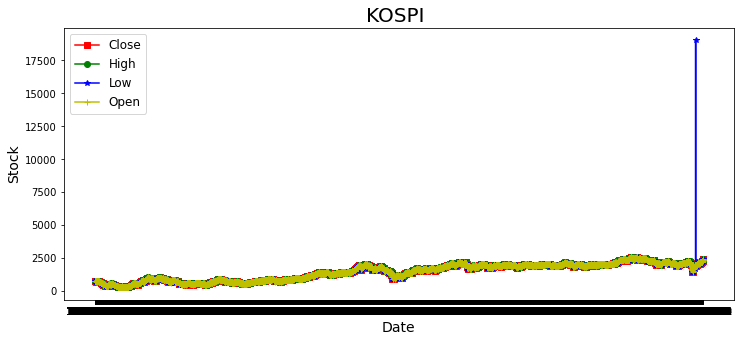

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

plt.rcParams["figure.figsize"] = (12,5)
# Line Graph by matplotlib with wide-form DataFrame

plt.plot(df.Date, df.Close, marker='s', color='r')
plt.plot(df.Date, df.High, marker='o', color='g')
plt.plot(df.Date, df.Low, marker='*', color='b')
plt.plot(df.Date, df.Open, marker='+', color='y')

plt.title('KOSPI ', fontsize=20) 
plt.ylabel('Stock', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(['Close', 'High', 'Low', 'Open'], fontsize=12, loc='best')

plt.show()

In [8]:
##

In [9]:
# 하한가가 상한가 보다 높은 경우 서칭
df.loc[df.Low > df.High]

,Date,Open,High,Low,Close,Adj Close,Volume
5620,2020-05-06,1919.449951,1928.76001,19025.550781,1928.76001,1928.76001,1082200.0


## outlier / novelties 구분

- outlier 숙청바앙ㄴ
+ 참값으로 대체하거나
+ 보간으로 대체하거나
+ 삭제해야 합니다.

In [10]:
## 주식 데이터의 경우 제공 업체가 여럿 있기에 지도 학습으로 비교 가능.
## 카카오 주식 데이터로 대체

# 카카오 주식차트 결과로 대체합니다. 
df.loc[df.Date == '2020-05-06', 'Low'] = 1903 

# 비정상데이터가 제거되었는지 다시 확인해 봅니다.
df.loc[df.Low>df.High]


,Date,Open,High,Low,Close,Adj Close,Volume


### novelties 특이치

- 정상적인 수집과정에 의한 이상치 의미

## recap

![](./img/01.png)
- 이상치Anomailies = 극단치Outlier + 특이치Novelites
- 극단치는 제거해야 모형에 좋습니다.
- 특이치는 남겨둬야 모형에 좋습니다.

## z_text 정규분포

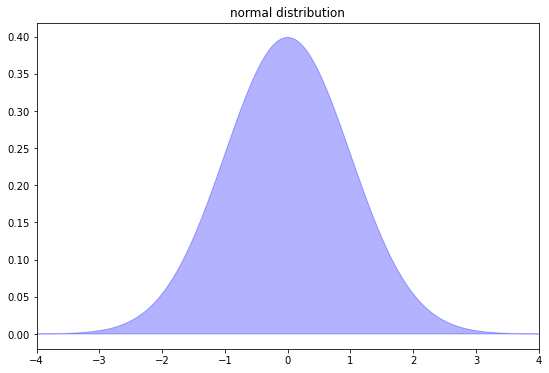

In [12]:
%matplotlib inline
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-5, 5, 0.001)
y = norm.pdf(x,0,1) 
# 평균이 0이고, 표준편차가 1인 정규분포를 그립니다.

# build the plot
fig, ax = plt.subplots(figsize=(9,6))
ax.fill_between(x,y,0, alpha=0.3, color='b')
ax.set_xlim([-4,4])
ax.set_title('normal distribution')
plt.show()

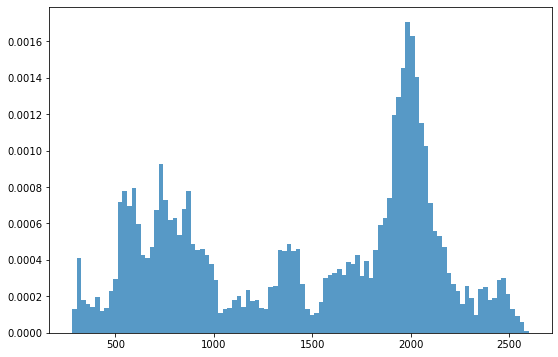

In [14]:
## 주식데이터 분포 확인 - 종가
fig, ax = plt.subplots(figsize=(9,6))
_ = plt.hist(df.Close, 100, density=True, alpha=0.75)

In [15]:
from statsmodels.stats.weightstats import ztest
_, p = ztest(df.Close)
print(p)

# p 값이 0.5 에 가깝지 않음....

0.0
